In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import SparseRandomProjection
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import datasets
import seaborn as sns
%matplotlib inline


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
cancer = load_breast_cancer()

X = scale(cancer.data)
y = pd.DataFrame(cancer.target)
variable_names = cancer.feature_names
X[0:2,0:2].shape

(2L, 2L)

In [4]:
# https://machinelearningmastery.com/feature-selection-machine-learning-python/


# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_



#Num Features: 3
#Selected Features: [ True False False False False  True  True False]
#Feature Ranking: [1 2 3 5 6 1 1 4]


Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]
Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


In [5]:
# https://machinelearningmastery.com/feature-selection-machine-learning-python/
    
# Feature Importance Extra Trees


# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[ 0.11177991  0.24646945  0.09611049  0.08166011  0.07890875  0.13433213
  0.11410096  0.13663821]


In [6]:
# https://github.com/CristiVlad25/ml-sklearn/blob/master/Machine%20Learning%20with%20Scikit-Learn%20-%2044%20-%20Automatic%20Feature%20Selection%20-%203.ipynb

# Model-Based Feature Selection

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

select.fit(X_train, y_train)
X_train_s = select.transform(X_train)
print('The shape of X_train is: ', X_train.shape)
print('The shape of X_train_s is ', X_train_s.shape)

mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Index of Features')

NameError: name 'X_train' is not defined

In [ ]:
X_test_s = select.transform(X_test)
score = LogisticRegression().fit(X_train_s, y_train).score(X_test_s, y_test)
print('The score of Logistic Regression with the selected features on the test set: {:.3f}'.format(score))

In [7]:
# https://www.youtube.com/watch?v=RXFnwCRb-is&index=42&list=PLonlF40eS6nynU5ayxghbz2QpDsUAyCVF
# Univariate Statistics
from sklearn.feature_selection import SelectPercentile

cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape is: {}'.format(X_train.shape))
print('X_train_selected.shape is: {}'.format(X_train_selected.shape))

X_train.shape is: (284L, 80L)
X_train_selected.shape is: (284L, 40L)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


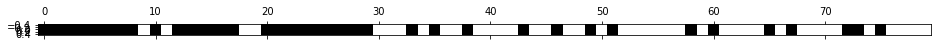

In [8]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [9]:
X_test_selected = select.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("The score of Logistic Regression on all features: {:.3f}".format(logreg.score(X_test, y_test)))

logreg.fit(X_train_selected, y_train)
print('The score of Logistic Regression on the selected features: {:.3f}'.format(logreg.score(X_test_selected, y_test)))

The score of Logistic Regression on all features: 0.930
The score of Logistic Regression on the selected features: 0.940


In [26]:
# breast cancer data univariate stats

In [33]:
# https://www.youtube.com/watch?v=RXFnwCRb-is&index=42&list=PLonlF40eS6nynU5ayxghbz2QpDsUAyCVF
# Univariate Statistics
from sklearn.feature_selection import SelectPercentile

cancer = load_breast_cancer()

X = scale(cancer.data)
y = pd.DataFrame(cancer.target)
variable_names = cancer.feature_names


rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X, cancer.target, random_state=0, test_size=.3)
#X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.3)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape is: {}'.format(X_train.shape))
print('X_train_selected.shape is: {}'.format(X_train_selected.shape))

X_train.shape is: (398L, 30L)
X_train_selected.shape is: (398L, 15L)


[ True False  True  True False  True  True  True False False  True False
  True  True False False False False False False  True False  True  True
 False  True  True  True False False]


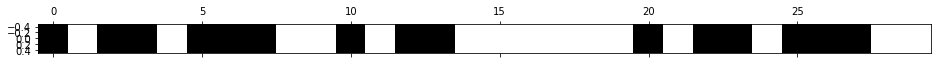

In [34]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [35]:
X_test_selected = select.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("The score of Logistic Regression on all features: {:.3f}".format(logreg.score(X_test, y_test)))

logreg.fit(X_train_selected, y_train)
print('The score of Logistic Regression on the selected features: {:.3f}'.format(logreg.score(X_test_selected, y_test)))

The score of Logistic Regression on all features: 0.982
The score of Logistic Regression on the selected features: 0.930
